In [ ]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df =pd.read_csv("height-weight.csv", sep='\t')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.columns

Index(['Weight', 'Height'], dtype='object')

Text(0, 0.5, 'Height')

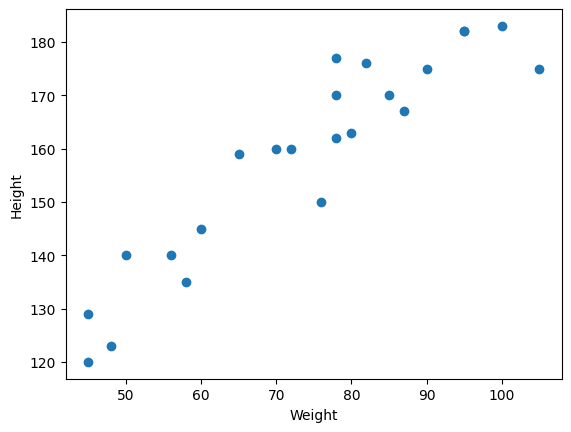

In [6]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [8]:
!pip install seaborn

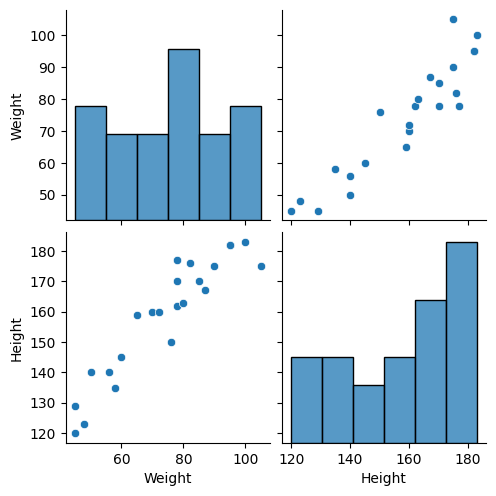

In [9]:
## Seaborn for viualization
import seaborn as sns
sns.pairplot(df)


In [10]:
## independent and dependent features
X=df[['Weight']]  ## independent features should be data frame or 2 dimensional
# np.array(X).shape
# X.head()

Y=df['Height'] ##this variable can be in series or 1d array

In [11]:
# X=df['Weight']
# np.array(X).shape
# X.head()

In [12]:
np.array(Y).shape

(23,)

In [13]:
!pip install scikit-learn

In [14]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [16]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [18]:
X_test=scaler.transform(X_test)

In [19]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [20]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [21]:
regression = LinearRegression(n_jobs=-1)

In [22]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [23]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [1.04792503]
Intercept: 80.52684512622542


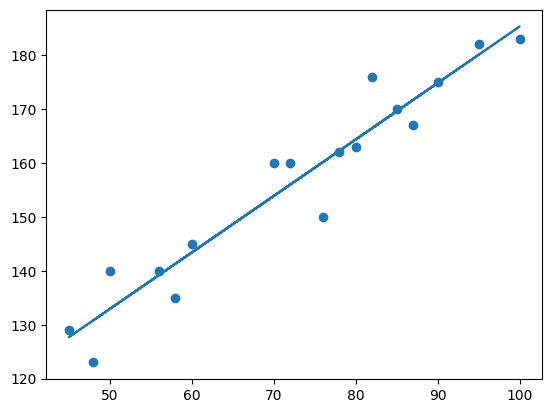

In [24]:
#plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

#### prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 80.526 + 1.04(X_test)

In [25]:
## Prediction for test data
Y_pred=regression.predict(X_test)

c:\Users\impre\OneDrive\Desktop\Bootcamp\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7276.932884039703
82.97662409755102
85.3049405605543


#### R Square
formula
R^2 = 1- SSR/SST
R^2 = coefficient of determination SSR = sum of sqaure of residuals SST = total sum of sqaures

In [28]:
from sklearn.metrics import r2_score

In [29]:
score=r2_score(Y_test,Y_pred)
print(score)

-15.723241865651406


In [30]:
#Adjusted R-square
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-19.904052332064257

In [31]:
!pip install statsmodels

In [32]:
# OLS Linear Regression
import statsmodels.api as sm

In [33]:
model=sm.OLS(Y_train,X_train).fit()

In [34]:
prediction = model.predict(X_test)
print(prediction)

[ 0.70487577  0.70487577 -3.5018828   2.87199382 -0.95233215  4.14676914]


In [35]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Thu, 22 Jan 2026   Prob (F-statistic):                    2.80e-16
Time:                        11:50:48   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\impre\OneDrive\Desktop\Bootcamp\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [36]:
print(regression.coef_)

[1.04792503]
